Nanosurf library demo
==========================================================================================

Here, i demonstrate some uses of the python library *nanosurf*, that uses the Nanosurf COM scripting interface.
First, you have to import the nanosurf library, simply like this:

In [1]:
import nanosurf as nsf

Then you create a connection to the Nanosurf SPM software.
Best is, when you start now your afm software and wait until it is ready. 
By this the script can find automatically your running afm software. Otherwise you would need to specifiy your afm software name in each script. 

In [2]:
spm = nsf.SPM()

# make a shortcut to the application object, to make subsequent code shorter:
application = spm.application
#while application.IsStartingUp:
#    pass

Connected to running app: CX


The braces after SPM are necessary, it denotes that we construct object of type SPM.

Standard Scripting Interface
----------------------------------------------------

Now for the first scripting interface application:

Now we hide the afm software:

In [3]:
application.Visible = False

Next we show it again. 

In [4]:
application.Visible = True

Did it work?

Now for the standard "Hello world" demo:

In [5]:
application.Visible = True

application.PrintStatusMsg("Hello world!")

The scripting interface itself does not allow making prominent messages, so you may easily miss the Hello World. To help you find it:
-   The status message is shown on the bottom left side of the software in the status bar. This message is more obvious, but may easily be overwritten by the next message from the software.
-   You can find the log message using the menu *Settings* > *Show Log Panel*. This allows a more persistent message, useful for debugging your scripts.

If the status messages are not shown, you may want to update your software to a current version...

Behind the screens, the nanosurf library uses the COM Scripting interface of the Nanosurf software you can find the full documentation in the *Script Programmers Manual*, which you can find in the *Help* panel of the Nanosurf software. The methods and attributes delivered by the scripting inteface use CamelCase names, as opposed to standard python_names for methods and attibutes.

If you have some experience with python, you can probably imagine that the examples above could be more useful in a command-line interface situation.

Now for a small taste of the kind of think that you can do with a Jupyter notebook, please set your AFM up to do a static-mode force distance curve meausrement, then execute the code below:

Connecting to a running Nanosurf Control software...
Connected to running app: CX


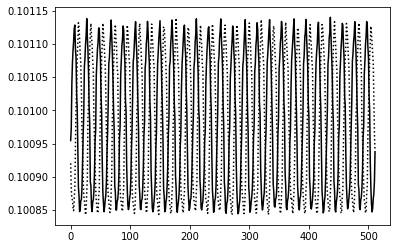

In [1]:

import matplotlib.pyplot as plt
import nanosurf as nsf

print("Connecting to a running Nanosurf Control software...")
spm = nsf.SPM() # Depending on the software version, this could be nanosurf.C3000(), or nanosurf.CoreAFM(), etc.
if spm.is_connected():
    if spm.is_scripting_enabled():

        # make a shortcut to the application object, to make subsequent code shorter:
        application = spm.application
        application.Visible = True

        spec = application.Spec
        spec.ModuleLevel = spm.SpecModuleLevel.Standart
        spec.ModulatedOutput = spm.SpecModulatedOutput.ZAxis
        spec.ActiveZController = False
        spec.EnableRelative = True
        spec.RepetitionMode = spm.SpecRepetitionMode.Position
        spec.Repetition = 1
        spec.SpecEndMode = spm.SpecEndMode.KeepLastZPos
        spec.StartOffsetMoveSpeed = 10e-6
        spec.StartOffset = 0.0
        spec.XYMoveSpeed = 100e-6

        spec.FwdModDataPoints = 512
        spec.FwdModulationMode = spm.SpecModulationMode.FixedLength
        spec.FwdModulationRange = 500e-9
        spec.FwdModulationTime = 0.5
        spec.FwdPauseMode = spm.SpecPauseMode.KeepLastZPos
        spec.FwdPauseDataPoints = 0

        spec.BwdModDataPoints = 512
        spec.BwdModulationMode = spm.SpecModulationMode.FixedLength
        spec.BwdModulationRange = -500e-9
        spec.BwdModulationTime = 0.5
        spec.BwdPauseMode = spm.SpecPauseMode.KeepLastZPos
        spec.BwdPauseDataPoints = 0

        spec.Start()
        while spec.IsMeasuring:
            pass

        # plot the result of the measurement:
        spec_line_no = 0
        plt.plot(spec.GetLine2(
            spm.SpecGroupNo.Forward, spm.SpecChannel.Deflection_or_ZCtrlIn, spec_line_no, spm.DataFilter.RAW, spm.DataConversion.Physical), 'k')
        plt.plot(spec.GetLine2(
            spm.SpecGroupNo.Backward, spm.SpecChannel.Deflection_or_ZCtrlIn, spec_line_no, spm.DataFilter.RAW, spm.DataConversion.Physical), 'k:')
        plt.show()
    else:
        print("Sorry scripting is not activated on this controller.")
del spm